Universidad del Valle de Guatemala  
Aprendizaje por Refuerzo
Alberto Suriano  

Laboratorio 5  
Marlon Hernández - 15177  

- Link del repositorio: https://github.com/ivanhez/RL-LAB5

## Task 1
Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.

1. **Defina y explique que es "expected sarsa"**
    
    Es una variante del algoritmo SARSA (State-Action-Reward-State-Action) que actualiza los valores Q basándose en el valor esperado de todas las posibles acciones futuras, ponderadas por su probabilidad de ser seleccionadas según la política actual.

- a. ¿Cómo se diferencia de "sarsa"?

    SARSA actualiza los valores Q basándose en la acción tomada en el siguiente estado, mientras que expected SARSA calcula los valores Q sobre todas las posibles acciones en el siguiente estado, ponderadas por la probabilidad de que cada acción sea seleccionada según la política actual.

- b. ¿Para qué sirven las modificaciones que se hacen sobre "sarsa"?

     Se busca mejorar la estabilidad y eficiencia del modelo al considerar todas las acciones posibles en lugar de una sola acción reduciendo la varianza en las actualizaciones, mejorando la convergencia hacia el valor Q óptimo, especialmente en entornos estocásticos donde las recompensas y transiciones pueden ser impredecibles.

2. *Defina y explique qué es "n-step TD"**

    Es una extensión del método de aprendizaje temporal diferencial que considera múltiples pasos de tiempo para actualizar los valores Q en lugar de hacerlo paso a paso como en TD(0). En lugar de actualizar los valores Q basándose únicamente en la recompensa inmediata y el valor del siguiente estado, n-step TD utiliza la suma de las recompensas de n pasos futuros más el valor del estado n pasos adelante.

- a. ¿Cómo se diferencia de TD(0)?

    TD(0) actualiza los valores Q basándose únicamente en la recompensa inmediata y el valor del siguiente estado, utilizando un solo paso para la actualización. n-step TD utiliza las recompensas acumuladas a lo largo de n pasos y el valor del estado alcanzado después de esos n pasos para la actualización.

- b. ¿Cuál es la utilidad de esta modificación?

    Esta modificación mejora el balance entre sesgo y varianza al considerar múltiples pasos, n-step TD puede reducir la varianza en las actualizaciones comparado con TD(0). Se tiene también una mayor flexibilidad en el aprendizaje ajustando el valor de n para controlar el grado de dependencia de las recompensas futuras, permitiendo adaptarse mejor a diferentes tipos de entornos.

- c. ¿Qué usa como objetivo?

    El objetivo de n-step TD es la suma de las recompensas obtenidas durante los próximos n pasos y el valor del estado alcanzado después de esos n pasos, ponderado por el factor de descuento. Esta combinación proporciona una estimación más precisa del retorno esperado a largo plazo, mejorando así la calidad de las actualizaciones de los valores Q.

3. *Cuál es la diferencia entre SARSA y Q-learning**

    SARSA actualiza los valores Q basándose en la acción que toma, reflejando la política actual (on-policy). Esto tiende a políticas más conservadoras y seguras, ya que considera las acciones de exploración. Q-learning busca aprender directamente la política óptima, utilizando siempre la acción con el mayor valor Q estimado para las actualizaciones, lo que puede conducir a una convergencia más rápida hacia la política óptima pero puede ser menos seguro en entornos inciertos.

## Task 2
En este laboratorio, compararán el rendimiento de SARSA y Q-Learning, dos algoritmos de aprendizaje de refuerzo
populares, utilizando el entorno CliffWalking-v0 de la biblioteca Gymnasium. Analizará y graﬁcará las recompensas
por episodio y responderá preguntas para profundizar su comprensión de las diferencias entre estos algoritmos.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

env = gym.make('CliffWalking-v0')

Q = defaultdict(lambda: np.zeros(env.action_space.n))

"""Política epsilon-greedy"""
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
    else:
        return np.argmax(Q[state])
    

"""SARSA"""
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    rewards_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(state, Q, epsilon)
        total_reward = 0
        done = False

        while not done:
            next_state, reward, done, truncated, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, Q, epsilon)
            td_target = reward + gamma * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            state, action = next_state, next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode


"""Q Learning"""
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    rewards_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy_policy(state, Q, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

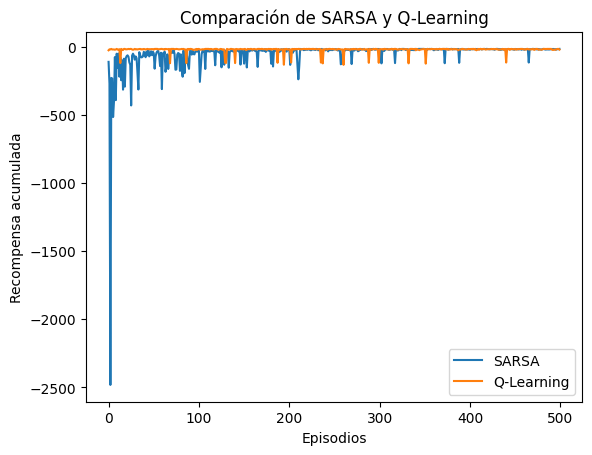

In [2]:
alpha = 0.1          
gamma = 0.99         
epsilon = 0.1        
num_episodes = 500

rewards_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)
rewards_q_learning = q_learning(env, num_episodes, alpha, gamma, epsilon)

plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('Comparación de SARSA y Q-Learning')
plt.legend()
plt.show()

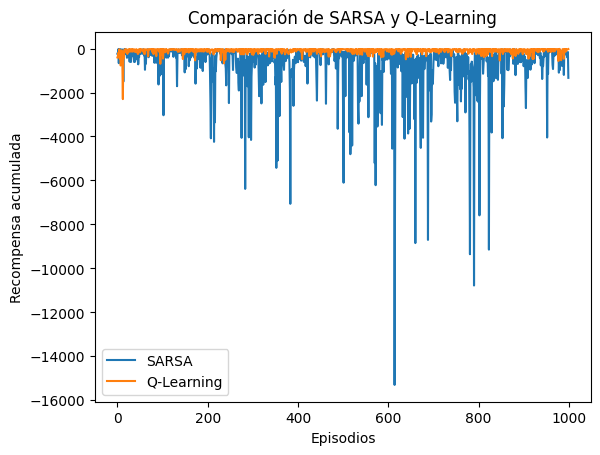

In [3]:
alpha = 0.2          
gamma = 0.8         
epsilon = 0.5        
num_episodes = 1000

rewards_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)
rewards_q_learning = q_learning(env, num_episodes, alpha, gamma, epsilon)

plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('Comparación de SARSA y Q-Learning')
plt.legend()
plt.show()

**P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?**
 - Q-Learning tiende a aprender más rápidamente y a alcanzar recompensas más altas que SARSA. Esto se debe a que Q-Learning es un algoritmo off-policy, lo que le permite aprender la política óptima independientemente durante el aprendizaje. SARSA es on-policy y aprende la política basada en las acciones tomadas, lo que resuñta en una exploración más conservadora y recompensas ligeramente menores en algunos casos.

**P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?**
 - Q-Learning utiliza la mejor acción posible en el siguiente estado para actualizar el valor Q, por lo que asume que siempre se tomará la acción óptima en el futuro. Esto maximiza el valor esperado de las recompensas futuras. SARSA utiliza la acción se toma según la política actual, lo que puede incluir acciones subóptimas debido a la exploración, resultando en una actualización de valores menos optimista.

**P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning?**
 - SARSA al ser on-policy aprende la política basada en las acciones que se toman, incluyendo las decisiones de exploración. Esto hace que SARSA sea más conservador y a menudo más seguro en entornos donde hay penalizaciones significativas por acciones incorrectas pues considera las consecuencias de la política actual durante el aprendizaje. Q-Learning que es off-policy aprende la política óptima independientemente de la política seguida, lo que puede llevar a un aprendizaje más rápido pero también más arriesgado si la política de exploración no está bien equilibrada.

**P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?**
 - En entornos donde hay penalizaciones significativas, SARSA tiende a aprender caminos más seguros. Debido a su naturaleza on-policy, SARSA considera las penalizaciones que podrían ocurrir durante el aprendizaje y ajusta la política para evitar acciones que podrían llevar a penalizarse, resultando en rutas más seguras aunque potencialmente menos óptimas en términos de recompensas.

**P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?**
 - Al disminuir el valor de epsilon con el tiempo reduce la exploración y aumenta la explotación de la política aprendida. Para SARSA, esto puede ayudar a consolidar una política más segura y evitar comportamientos riesgosos a medida que el agente aprende. Para Q-Learning, una disminución gradual de epsilon permite al agente explorar bastante al inicio y luego enfocarse en la explotación para maximizar las recompensas a largo plazo. Sin embargo, si epsilon se reduce demasiado rápido, ambos algoritmos podrían quedar atrapados en óptimos locales y no explorarían el entorno para encontrar la política óptima.

Referencias:
- https://medium.com/@flomay/using-q-learning-to-solve-the-cartpole-balancing-problem-c0a7f47d3f9d
- https://medium.com/@gelana/ensemble-reinforcement-learning-in-openai-gym-1d9c887a4fb1
- https://medium.com/swlh/learning-with-deep-sarsa-openai-gym-c9a470d027a
- https://medium.com/practical-coders-chronicles/learning-with-cliffwalking-sarsa-algorithm-in-3-easy-steps-95ca57735a8f